<a href="https://colab.research.google.com/github/rameshbabulakshmanan84/NLP-series/blob/master/ProductRecommendation_Fasttext_V0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Import the libraries
import pandas as pd
import os
import gensim

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

In [33]:
print(os.getcwd())

/content


In [34]:
df=pd.read_excel("/content/drive/My Drive/Online Retail.xlsx")

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
df.shape

(541909, 8)

In [37]:
#preprocessing
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [38]:
#drop the missing rows
df.dropna(inplace=True)

In [39]:
#Updated after sropping missing values
df.shape

(406829, 8)

In [40]:
#check the unique customers in dataset
len(df['CustomerID'].unique())
#4372 unique customers are there

4372

In [41]:
df['StockCode']= df['StockCode'].astype(str)

In [42]:
#Shuffle customer ids
customers=df['CustomerID'].unique().tolist()
#length
len(customers)

4372

In [43]:
import random
#shuffle customer ids
random.shuffle(customers)

In [44]:
#set the training and validation apart
#extract 90% of customer ids for training
customers_train=[customers[i] for i in range(round(0.9*len(customers)))]

In [46]:
#assign train and validatin set
#Train set
train_df=df[df['CustomerID'].isin(customers_train)]
#validation set
val_df=df[~df['CustomerID'].isin(customers_train)]

In [47]:
#list to create ourchase history
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in customers_train:
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)


In [48]:
#list to create ourchase history
# list to capture purchase history of the customers
val_train = []

# populate the list with the product codes
for i in val_df['CustomerID'].unique():
    temp = val_df[val_df["CustomerID"] == i]["StockCode"].tolist()
    val_train.append(temp)

In [49]:
print("Customer purchase training list",len(purchases_train))
print("Customers list",len(customers_train))

Customer purchase training list 3935
Customers list 3935


In [50]:
#example customer purchase from training list
purchases_train[0]

['84879',
 '22745',
 '22748',
 '22749',
 '22310',
 '84969',
 '22623',
 '22622',
 '21754',
 '21755',
 '21777',
 '48187',
 '22960',
 '22913',
 '22912',
 '22914',
 '21756',
 '22274',
 '16161P',
 '22766',
 '22708',
 '23231',
 '85015',
 '85016',
 '22829',
 '22722',
 '22960',
 '22961',
 '22969',
 '22720',
 '22549',
 '20972',
 '22743',
 '84969',
 '22622',
 '21658',
 '21756',
 '21754',
 '21755',
 '48184',
 '22692',
 '22748',
 '22745',
 '22749',
 '22960',
 '22722',
 '22720',
 '20972',
 '22274',
 '84969',
 '22623',
 '22499',
 '22607',
 '21658',
 '47566',
 '21756',
 '21754',
 '21755',
 '21902',
 '21901',
 '21899',
 '21900',
 '22077',
 '85123A',
 '84969',
 '21658',
 '22969',
 '23152',
 '23182',
 '23161',
 '23160',
 '23163',
 '23162',
 '23164',
 '23177',
 '23176',
 '23006',
 '22996',
 '23070',
 '23126',
 '23299',
 '84969',
 '21658',
 '22423',
 '47566',
 '21621',
 '21658',
 '23126',
 '23092',
 '23112',
 '23110',
 '23111',
 '23118',
 '23093',
 '23089',
 '23168',
 '23236',
 '23240',
 '23175',
 '23173'

In [51]:
#import fasttext 
from gensim.models import FastText

In [27]:
#Call fasttext model with necessary params
model_ft = FastText(window = 10,sg = 1,hs = 0,negative = 10,alpha=0.03, min_alpha=0.0007,seed = 14)

In [31]:
#build vocab using fasttext
model_ft.build_vocab(purchases_train, progress_per=200)

RuntimeError: ignored

In [32]:
#Train the model
model_ft.train(purchases_train,total_examples=model_ft.corpus_count,epochs=10,report_delay=1)
#minimum and maximum n grams size ? 
#min_n : Deafault 3
#Max_n:  Default 6 


In [33]:
print(model_ft)

FastText(vocab=3166, size=100, alpha=0.03)


In [34]:
model_ft.save("/content/drive/My Drive/NLP/fasttext.model")

In [52]:
model_ft1=FastText.load("/content/drive/My Drive/NLP/fasttext.model")

In [53]:
print(model_ft1.wv.vocab)

{'47594A': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e66d8>, '22371': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e67b8>, '21340': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6828>, '22720': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6898>, '82494L': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6908>, '85123A': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6978>, '21755': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e69e8>, '82484': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6a58>, '22469': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6ac8>, '22470': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6b38>, '85066': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6ba8>, '23226': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6c18>, '23133': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6c88>, '22776': <gensim.models.keyedvectors.Vocab object at 0x7f525d4e6cf8>, '22854': <gensim

In [54]:
print(model_ft1.wv.vectors)

[[ 0.43271866  0.06394319  0.34645814 ... -0.06326876 -0.3624925
   0.15769596]
 [ 0.0244501   0.11454512  0.04364393 ... -0.5544084  -0.29594764
  -0.08164983]
 [ 0.27556044  0.45231375  0.23589012 ... -0.7649995  -0.07082011
  -0.22541152]
 ...
 [ 0.05737849  0.06004256  0.09727194 ... -0.00937042 -0.1264495
   0.29602954]
 [ 0.20816578 -0.12486792  0.13497297 ...  0.21093062 -0.16666378
   0.09666897]
 [-0.46615055  0.2112892  -0.31255183 ... -0.21732171 -0.2733983
   0.35777235]]


In [55]:
model_ft1.wv.vectors.shape

(3166, 100)

In [40]:
#Visualize the embeddings
#use tsne
X_pca=model_ft1.wv.vectors
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(3166, 2)

In [41]:
vocab1=list(model_ft.wv.vocab)
df2 = pd.DataFrame(tsne, index=vocab1,columns=['X','Y'])

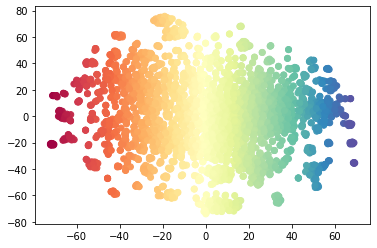

In [42]:
#Visualize the TSNE plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df2['X'],df2['Y'],c=df2['X'],cmap='Spectral')
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
plt.show()

In [44]:
#Lets start recommending products
products = train_df[["StockCode", "Description"]]

In [45]:
products

,StockCode,Description
9,84879,ASSORTED COLOUR BIRD ORNAMENT
10,22745,POPPY'S PLAYHOUSE BEDROOM
11,22748,POPPY'S PLAYHOUSE KITCHEN
12,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL
13,22310,IVORY KNITTED MUG COSY
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [46]:
#remve the duplicates
products.drop_duplicates(inplace=True,subset='StockCode',keep='last')

In [47]:
products.shape

(3658, 2)

In [48]:
# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [50]:
products_dict

{'10002': ['INFLATABLE POLITICAL GLOBE '],
 '10080': ['GROOVY CACTUS INFLATABLE'],
 '10120': ['DOGGY RUBBER'],
 '10123C': ['HEARTS WRAPPING TAPE '],
 '10124A': ['SPOTS ON RED BOOKCOVER TAPE'],
 '10124G': ['ARMY CAMO BOOKCOVER TAPE'],
 '10125': ['MINI FUNKY DESIGN TAPES'],
 '10133': ['COLOURING PENCILS BROWN TUBE'],
 '10135': ['COLOURING PENCILS BROWN TUBE'],
 '11001': ['ASSTD DESIGN RACING CAR PEN'],
 '15030': ['FAN BLACK FRAME '],
 '15034': ['PAPER POCKET TRAVELING FAN '],
 '15036': ['ASSORTED COLOURS SILK FAN'],
 '15039': ['SANDALWOOD FAN'],
 '15044A': ['PINK PAPER PARASOL '],
 '15044B': ['BLUE PAPER PARASOL '],
 '15044C': ['PURPLE PAPER PARASOL'],
 '15044D': ['RED PAPER PARASOL'],
 '15056BL': ['EDWARDIAN PARASOL BLACK'],
 '15056N': ['EDWARDIAN PARASOL NATURAL'],
 '15056P': ['EDWARDIAN PARASOL PINK'],
 '15058A': ['BLUE POLKADOT GARDEN PARASOL'],
 '15058B': ['PINK POLKADOT GARDEN PARASOL'],
 '15058C': ['ICE CREAM DESIGN GARDEN PARASOL'],
 '15060B': ['FAIRY CAKE DESIGN UMBRELLA'],
 '16

In [51]:
#Test the dictionary
products_dict['16162L']

['THE KING GIFT BAG']

In [52]:
#Define the top 6  similar products for fasttext model
def similar_products(v,n=6):
    ms=model_ft.similar_by_vector(v,topn=n+1)
    return ms
    #extract the name and similarity
    #new_ms=[]
    #for j in ms:
        #pair=(products_dict[j[0][0],j[1]])
        #new_ms.append(pair)
    #return new_ms
    

In [53]:
similar_products(model_ft['17109D'])

[('17109D', 1.0),
 ('17107D', 0.7641779184341431),
 ('22769', 0.7364847660064697),
 ('21112', 0.6938855648040771),
 ('85103', 0.6911485195159912),
 ('35915C', 0.6852931976318359),
 ('35915B', 0.6817309856414795)]

In [10]:
from gensim.models import Doc2Vec

In [ ]:
#dm - 1 means distributed memory similar to Word2vec CBOW
#Distributed Memory model preserves the word order in a document 
#100 dime vector for embedding ( size = 50)
#epochs = 50
#min_count =2 indicates words that should appear in minimum of 2 documents - less occurance would be discarded
#'alpha' is learning-rate,

In [67]:
Docmodel = Doc2Vec(size=100,
                alpha=0.025, 
                min_alpha=0.00025,
                min_count=2,
                dm =1)

In [68]:
print(Docmodel)

Doc2Vec(dm/m,d100,n5,w5,mc2,s0.001,t3)


In [69]:
#Doc2vec requires the documents in tagged documents form
from gensim.models.doc2vec import TaggedDocument

In [56]:
train_text=[TaggedDocument(words=sent , tags=[index]) for index,sent in enumerate(purchases_train) ]

In [87]:
#assign first setnce 
train_text[2]

TaggedDocument(words=['84947', '22214', '48187', '48173C', '48194', '48184', '22121', '21755', '22975', '22988', '22977', '22921', '22916', '22919', '22917', '22920', '22918', '22798', '22800', '22731', '22973', '22972', '22974', '22969', '21326', '22729', '22730', '22624', '22960', '22961', '22110', '21484', '22910', '21591', '22733', '22086', '22909', '22755', '22754', '22753', '22491', '22489', '22563', '22564', '23233', '23231', '23230', '23232', '21927', '21926', '21925', '22744', '22334', '22077', '21059', '22488', '22457', '22429', '22053', '82482', '82494L', '22766', '84949', '22637', '21340', '71459', '22495', '85053', '37379A', '84792', '21668', '21671', '21672', '22496', '22178', '21658', '22852', '85144', '37333', '22798', '21314', '84946', '85169A', '85169D', '85169B', '84951B', '22789', '22778', '22777', '22970', '90145', '90160B', '90160C', '90161B', '90161C', '90072', '90073', '22469', '22294', '22565', '17164B', '21788', '21789', '21679', '21544', '21224', '22550', '21

In [93]:
#assign a sample 
sample_test= train_text[2][0]
#print
sample_test

['84947',
 '22214',
 '48187',
 '48173C',
 '48194',
 '48184',
 '22121',
 '21755',
 '22975',
 '22988',
 '22977',
 '22921',
 '22916',
 '22919',
 '22917',
 '22920',
 '22918',
 '22798',
 '22800',
 '22731',
 '22973',
 '22972',
 '22974',
 '22969',
 '21326',
 '22729',
 '22730',
 '22624',
 '22960',
 '22961',
 '22110',
 '21484',
 '22910',
 '21591',
 '22733',
 '22086',
 '22909',
 '22755',
 '22754',
 '22753',
 '22491',
 '22489',
 '22563',
 '22564',
 '23233',
 '23231',
 '23230',
 '23232',
 '21927',
 '21926',
 '21925',
 '22744',
 '22334',
 '22077',
 '21059',
 '22488',
 '22457',
 '22429',
 '22053',
 '82482',
 '82494L',
 '22766',
 '84949',
 '22637',
 '21340',
 '71459',
 '22495',
 '85053',
 '37379A',
 '84792',
 '21668',
 '21671',
 '21672',
 '22496',
 '22178',
 '21658',
 '22852',
 '85144',
 '37333',
 '22798',
 '21314',
 '84946',
 '85169A',
 '85169D',
 '85169B',
 '84951B',
 '22789',
 '22778',
 '22777',
 '22970',
 '90145',
 '90160B',
 '90160C',
 '90161B',
 '90161C',
 '90072',
 '90073',
 '22469',
 '22294',

In [63]:
print(train_text[0:2])

[TaggedDocument(words=['84879', '22745', '22748', '22749', '22310', '84969', '22623', '22622', '21754', '21755', '21777', '48187', '22960', '22913', '22912', '22914', '21756', '22274', '16161P', '22766', '22708', '23231', '85015', '85016', '22829', '22722', '22960', '22961', '22969', '22720', '22549', '20972', '22743', '84969', '22622', '21658', '21756', '21754', '21755', '48184', '22692', '22748', '22745', '22749', '22960', '22722', '22720', '20972', '22274', '84969', '22623', '22499', '22607', '21658', '47566', '21756', '21754', '21755', '21902', '21901', '21899', '21900', '22077', '85123A', '84969', '21658', '22969', '23152', '23182', '23161', '23160', '23163', '23162', '23164', '23177', '23176', '23006', '22996', '23070', '23126', '23299', '84969', '21658', '22423', '47566', '21621', '21658', '23126', '23092', '23112', '23110', '23111', '23118', '23093', '23089', '23168', '23236', '23240', '23175', '23173', '23245', '23032', '23031', '23029', '23028', '85053', '22090', '22089', '22

In [70]:
#build vocabulary for the  model
Docmodel.build_vocab(train_text)

In [71]:
print(Docmodel.corpus_count)

3935


In [72]:
#Train the model
Docmodel.train(train_text,total_examples=Docmodel.corpus_count,epochs=5,report_delay=1)

In [73]:
#save the model
Docmodel.save('/content/drive/My Drive/NLP/Doc2vec-ProductRecommendation.model')

In [74]:
docmodel_1=Doc2Vec.load('/content/drive/My Drive/NLP/Doc2vec-ProductRecommendation.model')

In [78]:
#Retrieve the vectors for the model
docmodel_1.wv.vectors

array([[ 0.65055907,  0.75412697,  0.75339526, ...,  0.48260182,
        -0.844358  , -0.69295985],
       [-0.80731124,  0.63153774, -0.41522557, ...,  0.27193677,
         0.28824317, -0.41195416],
       [-0.23228322,  1.2209187 , -0.18106905, ..., -0.45493317,
        -0.39474556,  0.14014646],
       ...,
       [-0.0111066 ,  0.00964599, -0.00202635, ..., -0.01015447,
        -0.01109613, -0.02493961],
       [-0.06410803,  0.07010985, -0.0333432 , ..., -0.03099911,
        -0.00861119, -0.02187861],
       [-0.08403932,  0.11332393, -0.05102785, ..., -0.06139354,
        -0.00382461, -0.01660842]], dtype=float32)

In [81]:
docmodel_1.wv.vectors.shape

(3469, 100)

In [95]:
#infer the vector from the given token list
ivec = docmodel_1.infer_vector(doc_words=sample_test,steps=20,alpha=0.025)
#print the vector
ivec

array([-0.30413124,  0.71580416,  0.35128468, -0.4204742 , -0.30796975,
        0.46318462,  0.7465661 , -0.00798462, -0.31087416, -0.91009915,
       -0.52062094, -0.19786453, -0.09067529, -0.01278866,  0.5510455 ,
       -0.4029706 ,  0.6767193 ,  1.2654499 , -0.23918454,  0.827416  ,
       -0.55861443, -0.8314438 , -0.08870468, -0.5758288 , -0.16582325,
       -0.18973625, -0.29030454, -0.11000951,  0.20732501,  0.14779133,
        0.11204252,  0.08319303, -0.3614222 , -0.71471715,  0.4295358 ,
        0.73739433,  1.3538008 , -0.6156633 ,  0.3247805 , -0.86139685,
       -0.48449534, -0.03156788,  0.44136688,  0.63568187,  0.6309879 ,
       -0.18442732,  0.63414013,  0.12527126,  0.4694792 ,  0.36612937,
       -0.48377416, -0.11913507, -0.33202475,  0.38917375, -0.09331822,
        0.09659279, -0.8575559 , -0.09258565,  0.12971283, -0.00455023,
       -0.44694996, -0.6375594 , -0.19160612, -0.28402922,  0.07098135,
       -0.25296113, -0.5067672 ,  0.8407375 , -0.612004  , -0.57

In [96]:
 #use the most_similar utility to find the most similar documents.
docmodel_1.docvecs.most_similar(positive=[ivec],topn=5)


[(2, 0.740193247795105),
 (3014, 0.6865023970603943),
 (531, 0.5994364023208618),
 (162, 0.5686143636703491),
 (2391, 0.56211256980896)]